<a href="https://colab.research.google.com/github/NYahirGranadosVargas/Proyectos-/blob/main/Proyecto_M2_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa seleccionando a través de pruebas de hipótesis para justificarlo.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt #No quitar
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
df=pd.read_csv("/content/drive/MyDrive/Ucamp/dataset_Proyecto_M2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Visualizamos el tamaño de los registros del dataframe
df.shape

(887379, 74)

In [ ]:
# Visualizamos los datos.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



In [ ]:
# Aquí podemos visualizar los datos con valores muy grandes, por lo que su entendimiento se puede complicar en un principio
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [ ]:
# En esta parte podemos ver el tipo de datos que hay en el dataframe
# Hay valores que se puede graficar y hay otros que no ya que son de otro tipo.
# Existen variables de tipo "object" , "int64" y "float64"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
# Con el nombre de las columnas podemos dividir los registros por tipo de datos para un mejor manejo de datos.
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'd

In [ ]:
df_p=df.select_dtypes('float64').apply(pd.Series.nunique,axis=0)
df_p=pd.DataFrame(df_p)
df_p.head(10)

,0
loan_amnt,1372
funded_amnt,1372
funded_amnt_inv,9856
int_rate,542
installment,68711
annual_inc,49384
dti,4086
delinq_2yrs,29
inq_last_6mths,28
mths_since_last_delinq,155


In [ ]:
# Tipos de datos enteros del dataframe
df_1=df[['id','member_id']]
df_1.head()

,id,member_id
0,1077501,1296599
1,1077430,1314167
2,1077175,1313524
3,1076863,1277178
4,1075358,1311748


In [ ]:
# Almacenamos los datos faltantes en una variable.
completitud_1 = pd.DataFrame(df_1.isnull().sum()) # Con esto nos da los valores nulos que tenemos en el archivo
completitud_1

,0
id,0
member_id,0


In [ ]:
completitud_1.reset_index(inplace = True)
completitud_1

,index,0
0,id,0
1,member_id,0


In [ ]:
completitud_1 = completitud_1.rename(columns = {"index":"columna",0:"total"})
completitud_1["completitud"] = (1 - completitud_1["total"] / df.shape[0]) * 100
completitud_1 = completitud_1.sort_values(by = "completitud", ascending = True)
completitud_1.reset_index(drop = True, inplace = True)
completitud_1

,columna,total,completitud
0,id,0,100.0
1,member_id,0,100.0


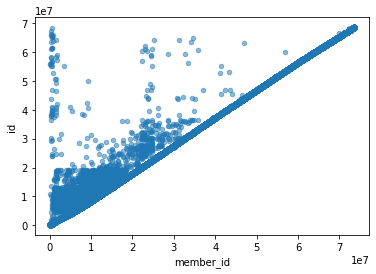

In [ ]:
datos_1 = pd.concat([df_1['id'], df_1['member_id']], axis=1)
datos_1.plot.scatter(x='member_id', y='id', alpha = 0.5);

In [ ]:
df_1.duplicated()
df_1=df_1.drop_duplicates()

In [ ]:
df_1

,id,member_id
0,1077501,1296599
1,1077430,1314167
2,1077175,1313524
3,1076863,1277178
4,1075358,1311748
...,...,...
887374,36371250,39102635
887375,36441262,39152692
887376,36271333,38982739
887377,36490806,39222577


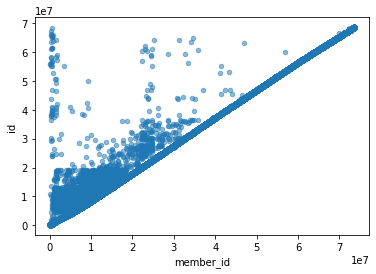

In [ ]:
datos_1 = pd.concat([df_1['id'], df_1['member_id']], axis=1)
datos_1.plot.scatter(x='member_id', y='id', alpha = 0.5);

In [ ]:
# En este df almacenamos la variables que son de tipo flotante, por lo que es más sencillo hacer el analisis y el manejo de datos.
df_2=df[[ 'funded_amnt','funded_amnt_inv','int_rate', 'installment','annual_inc','dti','delinq_2yrs','inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc','out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code',
       'annual_inc_joint', 'dti_joint','acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m','open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc','all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl','inq_last_12m']]
df_2.head()

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# En la siguiente tabla podemos observar la completitud de cada una de las columnas del dataframe de float
# existe ciertos datos que no cumplen con el 80% de completitud por lo que se deben eliminar para el analisis

completitud_2 = pd.DataFrame(df_2.isnull().sum()) # Con esto nos da los valores nulos que tenemos en el archivo
comp=completitud_2 # Variable aux para acer pruebas
completitud_2.reset_index(inplace = True)
completitud_2 = completitud_2.rename(columns = {"index":"columna",0:"total"})
completitud_2["completitud"] = (1 - completitud_2["total"] / df_2.shape[0]) * 100
completitud_2 = completitud_2.sort_values(by = "completitud", ascending = True)
completitud_2.reset_index(drop = True, inplace = True)
completitud_2

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,il_util,868762,2.097976
3,mths_since_rcnt_il,866569,2.345108
4,inq_last_12m,866007,2.408441
5,total_cu_tl,866007,2.408441
6,open_acc_6m,866007,2.408441
7,open_il_6m,866007,2.408441
8,open_il_12m,866007,2.408441
9,open_il_24m,866007,2.408441


In [ ]:
df_3=df[['term','grade', 'sub_grade', 'emp_title','emp_length', 'home_ownership','verification_status','issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d', 'last_credit_pull_d','application_type','verification_status_joint',
       ]]

In [ ]:
# Podemos ver la completitud de los datos de tipo object, de igual menara vamos a eleiminar los registros que no cumplan con el 80%

completitud_3 = pd.DataFrame(df_3.isnull().sum()) # Con esto nos da los valores nulos que tenemos en el archivo
comp=completitud_3 # Variable aux para acer pruebas
completitud_3.reset_index(inplace = True)
completitud_3 = completitud_3.rename(columns = {"index":"columna",0:"total"})
completitud_3["completitud"] = (1 - completitud_3["total"] / df_3.shape[0]) * 100
completitud_3 = completitud_3.sort_values(by = "completitud", ascending = True)
completitud_3.reset_index(drop = True, inplace = True)
completitud_3

,columna,total,completitud
0,verification_status_joint,886868,0.057585
1,desc,761351,14.202274
2,next_pymnt_d,252971,71.492339
3,emp_title,51462,94.200674
4,emp_length,44825,94.948607
5,last_pymnt_d,17659,98.009982
6,title,152,99.982871
7,last_credit_pull_d,53,99.994027
8,earliest_cr_line,29,99.996732
9,sub_grade,0,100.000000


## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [ ]:
# En las variables int todos nuestros datos estan completos por lo que no se elimina ninguna columna
completitud_1

,columna,total,completitud
0,id,0,100.0
1,member_id,0,100.0


In [ ]:
# En el caso de los float tenemos algunos registros que no cumplen, por lo que se deben eliminar
completitud_2

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,il_util,868762,2.097976
3,mths_since_rcnt_il,866569,2.345108
4,inq_last_12m,866007,2.408441
5,total_cu_tl,866007,2.408441
6,open_acc_6m,866007,2.408441
7,open_il_6m,866007,2.408441
8,open_il_12m,866007,2.408441
9,open_il_24m,866007,2.408441


In [ ]:
# De igual manera se deben eliminar los valores de completitud que no cumplan
completitud_3

,columna,total,completitud
0,verification_status_joint,886868,0.057585
1,desc,761351,14.202274
2,next_pymnt_d,252971,71.492339
3,emp_title,51462,94.200674
4,emp_length,44825,94.948607
5,last_pymnt_d,17659,98.009982
6,title,152,99.982871
7,last_credit_pull_d,53,99.994027
8,earliest_cr_line,29,99.996732
9,sub_grade,0,100.000000


In [ ]:
# Para el caso de las variables de tipo float
# Estas son las columnas que no cumplen con el criterio del 80%
null_cols=list(completitud_2[completitud_2["completitud"]<80]["columna"].values)
null_cols

['dti_joint',
 'annual_inc_joint',
 'il_util',
 'mths_since_rcnt_il',
 'inq_last_12m',
 'total_cu_tl',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'open_rv_24m',
 'open_rv_12m',
 'inq_fi',
 'max_bal_bc',
 'all_util',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq']

In [ ]:
# A continuacion vemos los valores de completitud de las columnas
completitud_2[completitud_2['columna'].isin(null_cols)] # estas no estan tan completas no cumplen con el 80%

,columna,total,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,il_util,868762,2.097976
3,mths_since_rcnt_il,866569,2.345108
4,inq_last_12m,866007,2.408441
5,total_cu_tl,866007,2.408441
6,open_acc_6m,866007,2.408441
7,open_il_6m,866007,2.408441
8,open_il_12m,866007,2.408441
9,open_il_24m,866007,2.408441


In [ ]:
# Para el caso de las variables de tipo object
# Estas son las columnas que no cumplen con el criterio del 80%
null_cols_3=list(completitud_3[completitud_3["completitud"]<80]["columna"].values)
null_cols_3

['verification_status_joint', 'desc', 'next_pymnt_d']

In [ ]:
completitud_3[completitud_3['columna'].isin(null_cols_3)] # estas no estan tan completas no cumplen con el 80%

,columna,total,completitud
0,verification_status_joint,886868,0.057585
1,desc,761351,14.202274
2,next_pymnt_d,252971,71.492339


Procedemos a eliminar las columnas que no cumplen el criterio en cada uno de los dataframe

In [ ]:
df_2=df_2.drop(columns=null_cols) # drop nos permite retirar las variables que no nos van a servir de las columnas de esta lista de columnas

In [ ]:
# A estas alturas el dataframe ya esta con registros que cumplen el criterio del 80%
completitud_2 = pd.DataFrame(df_2.isnull().sum()) # Con esto nos da los valores nulos que tenemos en el archivo
completitud_2.reset_index(inplace = True)
completitud_2 = completitud_2.rename(columns = {"index":"columna",0:"total"})
completitud_2["completitud"] = (1 - completitud_2["total"] / df_2.shape[0]) * 100
completitud_2 = completitud_2.sort_values(by = "completitud", ascending = True)
completitud_2.reset_index(drop = True, inplace = True)
comp_2=completitud_2
completitud_2

,columna,total,completitud
0,total_rev_hi_lim,70276,92.080498
1,tot_coll_amt,70276,92.080498
2,tot_cur_bal,70276,92.080498
3,revol_util,502,99.943429
4,collections_12_mths_ex_med,145,99.983660
5,total_acc,29,99.996732
6,pub_rec,29,99.996732
7,open_acc,29,99.996732
8,delinq_2yrs,29,99.996732
9,acc_now_delinq,29,99.996732


In [ ]:
df_3=df_3.drop(columns=null_cols_3) # drop nos permite retirar las variables que no nos van a servir de las columnas de esta lista de columnas

In [ ]:
completitud_3 = pd.DataFrame(df_3.isnull().sum()) # Con esto nos da los valores nulos que tenemos en el archivo
comp=completitud_3 # Variable aux para acer pruebas
completitud_3.reset_index(inplace = True)
completitud_3 = completitud_3.rename(columns = {"index":"columna",0:"total"})
completitud_3["completitud"] = (1 - completitud_3["total"] / df_3.shape[0]) * 100
completitud_3 = completitud_3.sort_values(by = "completitud", ascending = True)
completitud_3.reset_index(drop = True, inplace = True)
completitud_3

,columna,total,completitud
0,emp_title,51462,94.200674
1,emp_length,44825,94.948607
2,last_pymnt_d,17659,98.009982
3,title,152,99.982871
4,last_credit_pull_d,53,99.994027
5,earliest_cr_line,29,99.996732
6,term,0,100.000000
7,initial_list_status,0,100.000000
8,addr_state,0,100.000000
9,zip_code,0,100.000000


In [ ]:
completitud_1

,columna,total,completitud
0,id,0,100.0
1,member_id,0,100.0


In [ ]:
df_2.head(15)

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,...,0.00,0.00,0.0000,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,...,0.00,117.08,1.1100,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,...,0.00,0.00,0.0000,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,...,16.97,0.00,0.0000,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,...,0.00,0.00,0.0000,67.79,0.0,1.0,0.0,NaN,NaN,NaN
5,5000.0,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,...,0.00,0.00,0.0000,161.03,0.0,1.0,0.0,NaN,NaN,NaN
6,7000.0,7000.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,0.0,...,0.00,0.00,0.0000,170.08,0.0,1.0,0.0,NaN,NaN,NaN
7,3000.0,3000.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,0.0,...,0.00,0.00,0.0000,111.34,0.0,1.0,0.0,NaN,NaN,NaN
8,5600.0,5600.0,21.28,152.39,40000.0,5.55,0.0,2.0,11.0,0.0,...,0.00,189.06,2.0900,152.39,0.0,1.0,0.0,NaN,NaN,NaN
9,5375.0,5350.0,12.69,121.45,15000.0,18.08,0.0,0.0,2.0,0.0,...,0.00,269.29,2.5200,121.45,0.0,1.0,0.0,NaN,NaN,NaN


In [ ]:
df_3.head(15)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,Jan-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-1999,f,Apr-2013,Sep-2013,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,Jan-2016,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-1996,f,Jan-2015,Jan-2015,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Jan-2016,INDIVIDUAL
5,36 months,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-2004,f,Jan-2015,Sep-2015,INDIVIDUAL
6,60 months,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Loan,280xx,NC,Jul-2005,f,Jan-2016,Jan-2016,INDIVIDUAL
7,36 months,E,E1,MKC Accounting,9 years,RENT,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,car,Car Downpayment,900xx,CA,Jan-2007,f,Jan-2015,Dec-2014,INDIVIDUAL
8,60 months,F,F2,NaN,4 years,OWN,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-2004,f,Apr-2012,Aug-2012,INDIVIDUAL
9,60 months,B,B5,Starbucks,< 1 year,RENT,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,other,Building my credit history.,774xx,TX,Sep-2004,f,Nov-2012,Mar-2013,INDIVIDUAL


> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



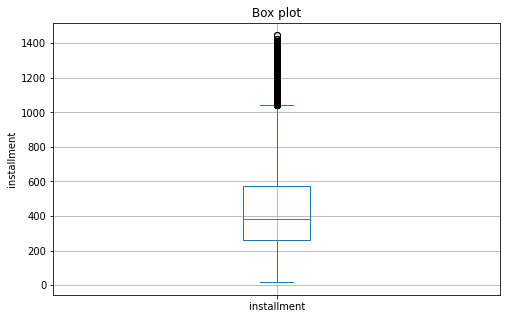

In [ ]:
df_2['installment'].plot(kind='box',figsize=(8,5))
plt.title('Box plot')
plt.ylabel('installment')
plt.grid()
plt.show()

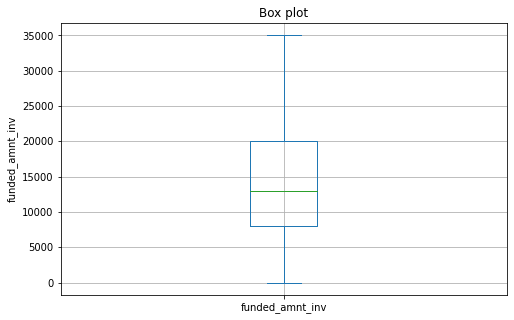

In [ ]:
df_2['funded_amnt_inv'].plot(kind='box',figsize=(8,5))
plt.title('Box plot')
plt.ylabel('funded_amnt_inv')
plt.grid()
plt.show()


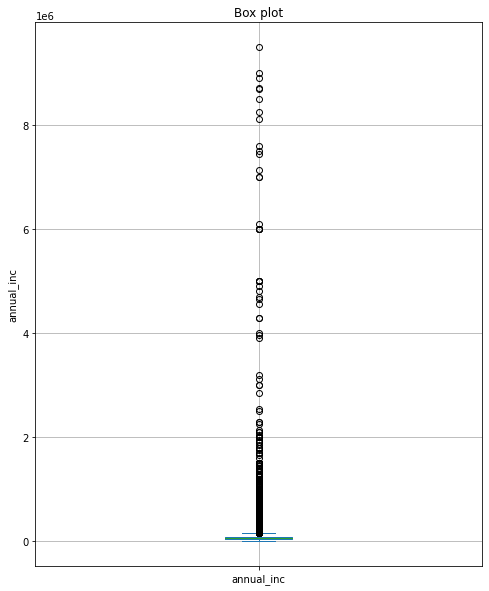

In [ ]:
df_2['annual_inc'].plot(kind='box',figsize=(8,10))
plt.title('Box plot')
plt.ylabel('annual_inc')
plt.grid()
plt.show()

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
df_2.head()

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,...,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,...,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,...,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,...,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,...,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN


In [ ]:
# En este caso, se estandarizan los datos de tipo float ya que son lo que contienen informacion más valiosa
# Se estandarizan todos los datos contenidos en el dataframe df_2

escalador = MinMaxScaler()# Funcion para escalar los datos
Transformador_2=escalador.fit_transform(df_2)
Transformador_2

array([[0.13043478, 0.14214286, 0.22517955, ...,        nan,        nan,
               nan],
       [0.05797101, 0.07142857, 0.42036333, ...,        nan,        nan,
               nan],
       [0.05507246, 0.06857143, 0.44951415, ...,        nan,        nan,
               nan],
       ...,
       [0.36231884, 0.37142857, 0.45078158, ..., 0.        , 0.00427221,
        0.0018    ],
       [0.33333333, 0.34285714, 0.61977186, ..., 0.        , 0.00730218,
        0.0027    ],
       [0.56521739, 0.57142857, 0.2817913 , ..., 0.        , 0.00416333,
        0.00417   ]])

In [ ]:
Transformado_2= pd.DataFrame(Transformador_2)
Transformado_2.columns = df_2.columns# agregamos las columnas de iris

In [ ]:
#Aqui podemos observar que los datos ya estan escalados a diferencia del anterior
Transformado_2.head()

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.130435,0.142143,0.225180,0.102952,0.002526,0.002765,0.0,0.030303,0.033333,0.0,...,0.000000,0.000000,0.000000,0.004705,0.0,0.0,0.0,NaN,NaN,NaN
1,0.057971,0.071429,0.420363,0.030886,0.003158,0.000100,0.0,0.151515,0.033333,0.0,...,0.000000,0.003493,0.000159,0.003281,0.0,0.0,0.0,NaN,NaN,NaN
2,0.055072,0.068571,0.449514,0.048021,0.001290,0.000872,0.0,0.060606,0.022222,0.0,...,0.000000,0.000000,0.000000,0.017818,0.0,0.0,0.0,NaN,NaN,NaN
3,0.275362,0.285714,0.345163,0.226355,0.005179,0.002000,0.0,0.030303,0.111111,0.0,...,0.047312,0.000000,0.000000,0.009801,0.0,0.0,0.0,NaN,NaN,NaN
4,0.072464,0.085714,0.311365,0.036453,0.008421,0.001794,0.0,0.000000,0.166667,0.0,...,0.000000,0.000000,0.000000,0.001859,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
Transformado_2.drop(['policy_code'],axis=1)

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.130435,0.142143,0.225180,0.102952,0.002526,0.002765,0.000000,0.030303,0.033333,0.000000,...,0.035573,0.000000,0.000000,0.000000,0.004705,0.00,0.0,NaN,NaN,NaN
1,0.057971,0.071429,0.420363,0.030886,0.003158,0.000100,0.000000,0.151515,0.033333,0.000000,...,0.017978,0.000000,0.003493,0.000159,0.003281,0.00,0.0,NaN,NaN,NaN
2,0.055072,0.068571,0.449514,0.048021,0.001290,0.000872,0.000000,0.060606,0.022222,0.000000,...,0.024938,0.000000,0.000000,0.000000,0.017818,0.00,0.0,NaN,NaN,NaN
3,0.275362,0.285714,0.345163,0.226355,0.005179,0.002000,0.000000,0.030303,0.111111,0.000000,...,0.091273,0.047312,0.000000,0.000000,0.009801,0.00,0.0,NaN,NaN,NaN
4,0.072464,0.085714,0.311365,0.036453,0.008421,0.001794,0.000000,0.000000,0.166667,0.000000,...,0.041687,0.000000,0.000000,0.000000,0.001859,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0.275362,0.285714,0.281791,0.221312,0.003263,0.002869,0.000000,0.000000,0.100000,0.011628,...,0.042443,0.000000,0.000000,0.000000,0.009105,0.00,0.0,0.0,0.003159,0.00171
887375,0.681159,0.685714,0.281791,0.546486,0.008316,0.000390,0.000000,0.030303,0.055556,0.000000,...,0.101863,0.000000,0.000000,0.000000,0.021851,0.00,0.0,0.0,0.017535,0.00102
887376,0.362319,0.371429,0.450782,0.210101,0.003684,0.003090,0.000000,0.000000,0.100000,0.011628,...,0.079537,0.000000,0.000000,0.000000,0.008665,0.00,0.0,0.0,0.004272,0.00180
887377,0.333333,0.342857,0.619772,0.211353,0.006779,0.002719,0.025641,0.060606,0.188889,0.000000,...,0.092333,0.000000,0.000000,0.000000,0.008714,0.05,0.0,0.0,0.007302,0.00270


In [ ]:
#Obaservamos la correlacion de los datos ya escaldos
Transformado_2.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
funded_amnt,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,-0.034711,0.199387,-0.080836,0.333435,0.120061,0.222575,0.648838,0.648839,0.473286,0.474502,0.389242,0.532864,0.031075,0.072687,0.051955,0.228772,-0.016491,nan,0.004051,-0.004275,0.328781,0.312439
funded_amnt_inv,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,-0.038880,0.200004,-0.079790,0.331736,0.120759,0.222793,0.651545,0.651556,0.468848,0.474062,0.384877,0.530382,0.027961,0.070751,0.049392,0.227510,-0.016063,nan,0.004245,-0.004274,0.328804,0.312473
int_rate,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,0.227650,-0.010381,0.052156,-0.035708,0.269139,-0.038618,0.042671,0.042529,0.170506,0.171479,0.054975,0.445679,0.057150,0.106840,0.070867,0.101179,0.013336,nan,0.026478,0.001130,-0.091408,-0.166119
installment,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,-0.003623,0.183868,-0.069967,0.316588,0.131798,0.200409,0.548159,0.548154,0.514954,0.515817,0.449439,0.498665,0.041810,0.074546,0.054313,0.238447,-0.014108,nan,0.006580,-0.003526,0.297898,0.286829
annual_inc,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,0.035193,0.138392,-0.008341,0.295784,0.036730,0.187335,0.211213,0.211254,0.160879,0.160821,0.149993,0.128535,0.013500,0.007717,0.006630,0.090964,-0.003936,nan,0.014775,0.001096,0.418332,0.268860
dti,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,-0.008106,0.144250,-0.022926,0.067277,0.087844,0.108056,0.059319,0.059282,-0.041529,-0.040336,-0.052056,0.008380,-0.005748,0.001162,0.002159,-0.029351,-0.000292,nan,0.003205,-0.002084,-0.007282,0.032941
delinq_2yrs,0.000151,0.000648,0.055178,0.007876,0.047470,-0.002831,1.000000,0.021375,0.051189,-0.011004,-0.032486,-0.017261,0.122713,0.031619,0.031608,-0.031902,-0.031470,-0.038393,0.001665,0.017432,-0.000729,0.000989,-0.019518,0.063016,nan,0.130326,0.000207,0.064762,-0.041070
inq_last_6mths,-0.034711,-0.038880,0.227650,-0.003623,0.035193,-0.008106,0.021375,1.000000,0.111235,0.056870,-0.017556,-0.087773,0.135584,-0.106736,-0.106756,0.077683,0.073846,0.062385,0.085585,0.031637,0.045590,0.034007,0.059998,0.006850,nan,-0.005329,0.003171,0.034338,0.005906
open_acc,0.199387,0.200004,-0.010381,0.183868,0.138392,0.144250,0.051189,0.111235,1.000000,-0.025301,0.224542,-0.143907,0.695075,0.171799,0.171802,0.042593,0.043831,0.031149,0.061223,-0.009606,0.001560,0.003217,0.028050,0.009610,nan,0.017752,0.000124,0.244134,0.325787
pub_rec,-0.080836,-0.079790,0.052156,-0.069967,-0.008341,-0.022926,-0.011004,0.056870,-0.025301,1.000000,-0.100609,-0.079674,0.012472,-0.007674,-0.007671,-0.087876,-0.087105,-0.084502,-0.060064,-0.011445,-0.014477,-0.008795,-0.034249,0.021039,nan,0.000349,0.006891,-0.075814,-0.100144


In [ ]:
Transformado_2.describe()

,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887375.000000,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,817103.000000,817103.000000,817103.000000
mean,0.412808,0.420070,0.334885,0.294482,0.007898,0.001816,0.008063,0.021049,0.128316,0.002271,...,0.001106,0.001370,0.000697,0.059331,0.000719,0.0,0.000357,0.000025,0.017432,0.003207
std,0.244345,0.241203,0.185123,0.170785,0.006810,0.001719,0.022109,0.030256,0.059081,0.006768,...,0.011397,0.012222,0.009015,0.131452,0.006710,0.0,0.005545,0.001127,0.019219,0.003750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.217391,0.228571,0.197296,0.171378,0.004737,0.001191,0.000000,0.000000,0.088889,0.000000,...,0.000000,0.000000,0.000000,0.007681,0.000000,0.0,0.000000,0.000000,0.003732,0.001390
50%,0.362319,0.371429,0.324039,0.256597,0.006842,0.001765,0.000000,0.000000,0.122222,0.000000,...,0.000000,0.000000,0.000000,0.012687,0.000000,0.0,0.000000,0.000000,0.010070,0.002370
75%,0.565217,0.571429,0.459654,0.389519,0.009474,0.002395,0.000000,0.030303,0.155556,0.000000,...,0.000000,0.000000,0.000000,0.022789,0.000000,0.0,0.000000,0.000000,0.026025,0.003980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


## Parte 4

Selecciona la mejor técnica para reducir las dimenciones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Creamos una nuevo data frame con las variables ya escaladas
ndf=Transformado_2[['funded_amnt','funded_amnt_inv','int_rate','installment']]
ndf.head()

,funded_amnt,funded_amnt_inv,int_rate,installment
0,0.130435,0.142143,0.225180,0.102952
1,0.057971,0.071429,0.420363,0.030886
2,0.055072,0.068571,0.449514,0.048021
3,0.275362,0.285714,0.345163,0.226355
4,0.072464,0.085714,0.311365,0.036453


In [ ]:
#Entrenamos el modelo PCA usando la funcion conicida de fit transform
pca=PCA(3)

In [ ]:
#Con el data nuevo ya escalado aplicamos la matriz de covarianzas para calcular los componentes
pca.fit_transform(ndf)


array([[-0.44822097, -0.0692312 , -0.00147384],
       [-0.55244069,  0.13641626, -0.02120127],
       [-0.54605137,  0.16498925, -0.00380824],
       ...,
       [-0.08878632,  0.12478722, -0.04485835],
       [-0.10941248,  0.29623425, -0.02495897],
       [ 0.25660263, -0.07707793,  0.04980511]])

In [ ]:
#Generamos la varianza para cada columna
pca_variance = pca.explained_variance_
pca_variance

array([0.14532906, 0.03334624, 0.00253135])

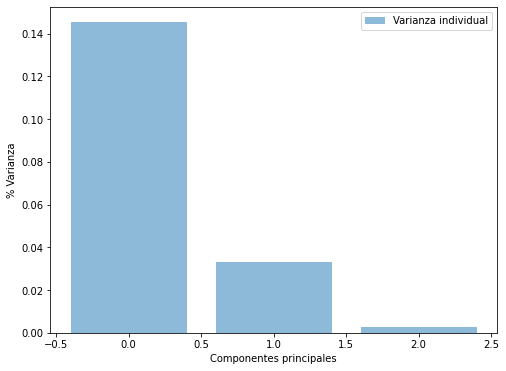

In [ ]:
#Generamos un diagrama de barras con la variables del pca
plt.figure(figsize=(8, 6))
plt.bar(range(3), pca_variance, alpha=0.5, align='center', label="Varianza individual")
plt.legend()
plt.ylabel('% Varianza')
plt.xlabel('Componentes principales')
plt.show()

In [ ]:
pcs=pca.components_
pcs

array([[ 0.6389249 ,  0.63040734,  0.09092223,  0.43138696],
       [-0.05635649, -0.05543308,  0.99583571, -0.04541309],
       [-0.29053151, -0.322868  ,  0.00666149,  0.90072378]])

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.

